In [36]:
#%pip install pandas_datareader

In [139]:
import refinitiv.dataplatform as rdp
import numpy as np  # NumPy
import pandas as pd  # pandas
#import cufflinks as cf  # Cufflinks
import configparser as cp
#cf.set_config_file(offline=True)  # set the plotting mode to offline

%matplotlib inline

from numpy.random import random, uniform, dirichlet, choice
from numpy.linalg import inv
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import math
from datetime import datetime, timedelta
import pandas_datareader.data as web


In [137]:
import refinitiv.dataplatform as rdp
%run ../credentials.ipynb

In [138]:
session = rdp.open_platform_session(
    APP_KEY,
    rdp.GrantPassword(
        username = RDP_LOGIN,
        password = RDP_PASSWORD
    )
)

In [140]:
SPY= rdp.get_data('SPY', ['TR.ETPConstituentRIC',
        'TR.ETPConstituentName',
        'TR.ETPConstituentWeightPercent'])

In [141]:
SPY

,instrument,TR.ETPConstituentRIC,TR.ETPConstituentName,TR.ETPConstituentWeightPercent
0,SPY,SHW.N,SHERWIN WILLIAMS ORD,0.182302579207
1,SPY,DTE.N,DTE ENERGY ORD,0.056078702975
2,SPY,LOW.N,LOWE'S COS INC ORD,0.302197698694
3,SPY,WBA.OQ,WALGREENS BOOTS ALLIANCE INC,0.01384497251
4,SPY,MAR.OQ,MARRIOTT INTL A ORD,0.118982834854
...,...,...,...,...
498,SPY,CI.N,THE CIGNA GROUP ORD,0.222989093818
499,SPY,FIS.N,FIDELITY NATIONAL INFORMATN SVCS ORD,0.09902900542
500,SPY,FTNT.OQ,FORTINET ORD,0.10532267988
501,SPY,TXN.OQ,TEXAS INSTRUMENTS ORD,0.395813137369


In [142]:
# se definen algunos criterios de estilos para los gráficos
sns.set_style('whitegrid')
np.random.seed(42)
cmap = sns.diverging_palette(10, 240, n=9, as_cmap=True)

In [143]:
end = datetime.today()
start = end - timedelta(days=(365.2*10))
print(start, end)

2014-09-05 16:49:15.965005 2024-09-04 16:49:15.965005


In [144]:
const = SPY['TR.ETPConstituentRIC'].tolist()
const_limp = [i for i in const if i != '']
const = ['AAPL.O', 'NVDA.O', ']
const

['SHW.N',
 'DTE.N',
 'LOW.N',
 'WBA.OQ',
 'MAR.OQ',
 'EMR.N',
 'WEC.N',
 'REG.OQ',
 'MS.N',
 'BLK.N',
 'WYNN.OQ',
 'HOLX.OQ',
 'BRKb.N',
 'DVN.N',
 'ALLE.N',
 'DOC.N',
 'DLTR.OQ',
 'PAYX.OQ',
 'AAL.OQ',
 'TER.OQ',
 'WDC.OQ',
 'PWR.N',
 'XOM.N',
 'NDAQ.OQ',
 'DPZ.N',
 'BX.N',
 'HES.N',
 'BXP.N',
 'BEN.N',
 'APA.OQ',
 'AMAT.OQ',
 'CPAY.N',
 'PODD.OQ',
 'RF.N',
 'PEG.N',
 'ALL.N',
 'SLB.N',
 'PGR.N',
 'PTC.OQ',
 'SWKS.OQ',
 'EL.N',
 'NOC.N',
 'PKG.N',
 'CSX.OQ',
 'MSCI.N',
 'MGM.N',
 'ANSS.OQ',
 'UNH.N',
 'ALGN.OQ',
 'TTWO.OQ',
 'HUBB.N',
 'BIO.N',
 'CAG.N',
 'INCY.OQ',
 'ADBE.OQ',
 'BLDR.N',
 'NTRS.OQ',
 'SPGI.N',
 'CVX.N',
 'AIZ.N',
 'CNC.N',
 'AKAM.OQ',
 'CTRA.N',
 'ROP.OQ',
 'BIIB.OQ',
 'K.N',
 'EQIX.OQ',
 'DD.N',
 'STLD.OQ',
 'MPWR.OQ',
 'WFC.N',
 'SJM.N',
 'ZBRA.OQ',
 'CPRT.OQ',
 'BFb.N',
 'NOW.N',
 'TT.N',
 'IBM.N',
 'PAYC.N',
 'SOLV.N',
 'NFLX.OQ',
 'GL.N',
 'COO.OQ',
 'APTV.N',
 'GIS.N',
 'NRG.N',
 'ROST.OQ',
 'BMY.N',
 'ALB.N',
 'APD.N',
 'DOW.N',
 'REGN.OQ',
 'OXY.N',
 'DAY.N',

In [145]:
const[0]

'SHW.N'

In [146]:
df1 = rdp.get_historical_price_summaries(
    universe = const[0],
    interval = rdp.Intervals.WEEKLY,          # Supported intervals: DAILY, WEEKLY, MONTHLY, QUARTERLY, YEARLY.
    start=start, end=end,
    fields = ['BID']
)
df1['BID'] = df1['BID'].astype(float)
df1[const[0]] = np.log(df1['BID'].div(df1['BID'].shift(1)))
weekly_returns = df1.drop(['BID'], axis=1)
weekly_returns 

list_instrument = const[1:]

for intrument in range(1,len(list_instrument)):
    print(list_instrument[intrument])
    df1 = rdp.get_historical_price_summaries(
    universe = list_instrument[intrument],
    interval = rdp.Intervals.WEEKLY,          # Supported intervals: DAILY, WEEKLY, MONTHLY, QUARTERLY, YEARLY.
    start=start, end=end,
    fields = ['BID']
    )
    df1['BID'] = df1['BID'].astype(float)
    df1[list_instrument[intrument]] = np.log(df1['BID'].div(df1['BID'].shift(1)))
    df1 = df1.drop(['BID'], axis=1)
    weekly_returns = weekly_returns.join(df1)

LOW.N
WBA.OQ
MAR.OQ
EMR.N
WEC.N
REG.OQ
MS.N
BLK.N
WYNN.OQ
HOLX.OQ
BRKb.N
DVN.N
ALLE.N
DOC.N
DLTR.OQ
PAYX.OQ
AAL.OQ
TER.OQ
WDC.OQ
PWR.N
XOM.N
NDAQ.OQ
DPZ.N
BX.N
HES.N
BXP.N
BEN.N
APA.OQ
AMAT.OQ
CPAY.N
PODD.OQ
RF.N
PEG.N
ALL.N
SLB.N
PGR.N
PTC.OQ
SWKS.OQ
EL.N
NOC.N
PKG.N
CSX.OQ
MSCI.N
MGM.N
ANSS.OQ
UNH.N
ALGN.OQ
TTWO.OQ
HUBB.N
BIO.N
CAG.N
INCY.OQ
ADBE.OQ
BLDR.N
NTRS.OQ
SPGI.N
CVX.N
AIZ.N
CNC.N
AKAM.OQ
CTRA.N
ROP.OQ
BIIB.OQ
K.N
EQIX.OQ
DD.N
STLD.OQ
MPWR.OQ
WFC.N
SJM.N
ZBRA.OQ
CPRT.OQ
BFb.N
NOW.N
TT.N
IBM.N
PAYC.N
SOLV.N
NFLX.OQ
GL.N
COO.OQ
APTV.N
GIS.N
NRG.N
ROST.OQ
BMY.N
ALB.N
APD.N
DOW.N
REGN.OQ
OXY.N
DAY.N
VTR.N
PNW.N
AFL.N
AON.N
LMT.N
ZTS.N
EVRG.OQ
COR.N
CDNS.OQ
EA.OQ
ORLY.OQ
FITB.OQ
CHRW.OQ
ECL.N
MRNA.OQ
PHM.N
EXR.N
VRSN.OQ
TXT.N
EBAY.OQ
BAC.N
PYPL.OQ
CMCSA.OQ
EQR.N
SBUX.OQ
EW.N
TMO.N
NXPI.OQ
HPE.N
ENPH.OQ
HAS.OQ
IR.N
KHC.OQ
HAL.N
BR.N
QCOM.OQ
PCG.N
DGX.N
TDG.N
IPG.N
JNPR.N
TMUS.OQ
CTLT.N
ESS.N
FDS.N
WTW.OQ
JBHT.OQ
AMGN.OQ
TAP.N
EFX.N
UAL.OQ
FI.N
NI.N
CSCO.OQ
MDLZ.OQ
UBER.N
LHX.N
NKE.

In [90]:
weekly_returns 

,SHW.N,LOW.N,WBA.OQ,MAR.OQ,EMR.N,WEC.N,REG.OQ,MS.N,BLK.N,WYNN.OQ,...,EXPE.OQ,COP.N,SNPS.OQ,CF.N,ABNB.OQ,CI.N,FIS.N,FTNT.OQ,TXN.OQ,CTAS.OQ
2014-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-12,-0.012126,-0.021293,-0.017831,-0.002687,-0.009262,-0.032124,-0.050484,0.011202,-0.011002,-0.016790,...,-0.014795,-0.024058,-0.006781,-0.012847,NaN,-0.043142,-0.025625,0.000758,-0.015562,-0.004962
2014-09-19,0.023201,0.021663,0.000796,0.021850,0.007878,0.001812,-0.000545,0.020637,0.008354,0.015064,...,-0.016308,0.026668,-0.007317,0.031466,NaN,0.031454,0.004200,0.000379,0.019261,0.012136
2014-09-26,0.000634,-0.017894,-0.044069,-0.020576,-0.030464,-0.031960,-0.013912,-0.031550,0.009240,-0.004165,...,0.008769,-0.030756,-0.020527,0.071802,NaN,-0.036994,-0.010534,-0.044108,-0.009067,-0.013343
2014-10-03,-0.022306,0.007868,0.010255,-0.037757,-0.010044,0.023324,0.000184,0.011770,-0.023905,-0.012325,...,-0.005135,-0.044231,-0.010045,-0.009802,NaN,-0.014040,-0.003182,0.010624,-0.031969,0.059470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09,-0.004129,-0.019156,-0.072234,0.019380,-0.051592,-0.024593,0.001706,-0.011862,0.012588,-0.028934,...,0.118928,0.026967,0.037296,0.085554,-0.108294,-0.002524,0.043058,0.209783,0.025557,-0.002116
2024-08-16,0.024351,0.022314,0.020390,0.012730,-0.006094,0.017580,-0.009132,0.068458,0.018401,0.022401,...,0.007661,0.023295,0.045324,0.015057,0.011063,0.017713,0.018009,0.069547,0.042375,0.012292
2024-08-23,0.012626,0.036531,-0.057590,0.020685,0.015119,0.034367,0.023237,0.004329,0.012648,0.014057,...,0.052624,0.001707,-0.018548,-0.007065,0.004032,0.032788,0.002781,-0.000268,0.045572,0.030529
2024-08-30,0.029749,-0.006983,-0.106549,0.041323,0.007237,0.003986,0.017631,0.016553,0.020753,-0.006483,...,0.006999,0.021321,-0.036697,0.032429,0.004101,0.022143,0.039478,0.026291,0.020374,0.020519


In [147]:
# Se identifican activos que no tengan la historia de rendimientos completa
s = weekly_returns.isnull().apply(sum, axis=0) # count the number of nan in each column
for col in weekly_returns: 
   if s[col] >= 2:  
       del weekly_returns[col]

In [148]:
weekly_returns = weekly_returns.dropna()
weekly_returns

,SHW.N,LOW.N,WBA.OQ,MAR.OQ,EMR.N,WEC.N,REG.OQ,MS.N,BLK.N,WYNN.OQ,...,CHD.N,EXPE.OQ,COP.N,SNPS.OQ,CF.N,CI.N,FIS.N,FTNT.OQ,TXN.OQ,CTAS.OQ
2014-09-12,-0.012126,-0.021293,-0.017831,-0.002687,-0.009262,-0.032124,-0.050484,0.011202,-0.011002,-0.016790,...,0.001733,-0.014795,-0.024058,-0.006781,-0.012847,-0.043142,-0.025625,0.000758,-0.015562,-0.004962
2014-09-19,0.023201,0.021663,0.000796,0.021850,0.007878,0.001812,-0.000545,0.020637,0.008354,0.015064,...,0.011189,-0.016308,0.026668,-0.007317,0.031466,0.031454,0.004200,0.000379,0.019261,0.012136
2014-09-26,0.000634,-0.017894,-0.044069,-0.020576,-0.030464,-0.031960,-0.013912,-0.031550,0.009240,-0.004165,...,0.004838,0.008769,-0.030756,-0.020527,0.071802,-0.036994,-0.010534,-0.044108,-0.009067,-0.013343
2014-10-03,-0.022306,0.007868,0.010255,-0.037757,-0.010044,0.023324,0.000184,0.011770,-0.023905,-0.012325,...,-0.009127,-0.005135,-0.044231,-0.010045,-0.009802,-0.014040,-0.003182,0.010624,-0.031969,0.059470
2014-10-10,-0.012772,0.001864,0.035721,-0.069003,-0.049095,0.039168,0.021334,-0.062106,-0.057470,-0.031211,...,-0.009935,-0.053599,-0.060391,-0.061414,-0.033334,0.000331,-0.039731,-0.080663,-0.090534,-0.025493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-09,-0.004129,-0.019156,-0.072234,0.019380,-0.051592,-0.024593,0.001706,-0.011862,0.012588,-0.028934,...,0.036571,0.118928,0.026967,0.037296,0.085554,-0.002524,0.043058,0.209783,0.025557,-0.002116
2024-08-16,0.024351,0.022314,0.020390,0.012730,-0.006094,0.017580,-0.009132,0.068458,0.018401,0.022401,...,-0.022062,0.007661,0.023295,0.045324,0.015057,0.017713,0.018009,0.069547,0.042375,0.012292
2024-08-23,0.012626,0.036531,-0.057590,0.020685,0.015119,0.034367,0.023237,0.004329,0.012648,0.014057,...,0.021083,0.052624,0.001707,-0.018548,-0.007065,0.032788,0.002781,-0.000268,0.045572,0.030529
2024-08-30,0.029749,-0.006983,-0.106549,0.041323,0.007237,0.003986,0.017631,0.016553,0.020753,-0.006483,...,-0.002746,0.006999,0.021321,-0.036697,0.032429,0.022143,0.039478,0.026291,0.020374,0.020519


In [149]:
weekly_returns.shape

(522, 466)

# Set Parameters

In [150]:
stocks = weekly_returns.columns

In [151]:
n_obs, n_assets = weekly_returns.shape
n_assets, n_obs

(466, 522)

In [152]:
NUM_PF = 100000 # no of portfolios to simulate

In [153]:
x0 = uniform(0, 1, n_assets)
x0 /= np.sum(np.abs(x0))
x0

array([1.62601374e-03, 4.12739368e-03, 3.17784970e-03, 2.59899239e-03,
       6.77333187e-04, 6.77228473e-04, 2.52161908e-04, 3.76038304e-03,
       2.60965706e-03, 3.07399843e-03, 8.93647136e-05, 4.21072847e-03,
       3.61393373e-03, 9.21840660e-04, 7.89367758e-04, 7.96225123e-04,
       1.32082530e-03, 2.27815692e-03, 1.87522911e-03, 1.26433073e-03,
       2.65627408e-03, 6.05593158e-04, 1.26830528e-03, 1.59050889e-03,
       1.97996428e-03, 3.40873202e-03, 8.66855901e-04, 2.23247716e-03,
       2.57188530e-03, 2.01657994e-04, 2.63757132e-03, 7.40306721e-04,
       2.82412426e-04, 4.11945434e-03, 4.19215691e-03, 3.50954444e-03,
       1.32243823e-03, 4.24029873e-04, 2.97050234e-03, 1.91086072e-03,
       5.29811991e-04, 2.14974155e-03, 1.49292972e-04, 3.94768781e-03,
       1.12345723e-03, 2.87624818e-03, 1.35325020e-03, 2.25780284e-03,
       2.37346650e-03, 8.02519860e-04, 4.20931655e-03, 3.36513114e-03,
       4.07870374e-03, 3.88476825e-03, 2.59569944e-03, 4.00218853e-03,
      

# Annualization Factor

In [156]:
#periods_per_year = round(weekly_returns.resample('YE').size().mean())
periods_per_year = round(weekly_returns.resample('A').size().mean())
periods_per_year

47

# Compute Mean Returns, Covariance and Precision Matrix

In [155]:
mean_returns = weekly_returns.mean()
cov_matrix = weekly_returns.cov()
cov_matrix

,SHW.N,LOW.N,WBA.OQ,MAR.OQ,EMR.N,WEC.N,REG.OQ,MS.N,BLK.N,WYNN.OQ,...,CHD.N,EXPE.OQ,COP.N,SNPS.OQ,CF.N,CI.N,FIS.N,FTNT.OQ,TXN.OQ,CTAS.OQ
SHW.N,0.001228,0.000924,0.000389,0.000710,0.000619,0.000401,0.000634,0.000725,0.000809,0.000910,...,0.000315,0.000830,0.000331,0.000641,0.000557,0.000493,0.000633,0.000578,0.000570,0.000704
LOW.N,0.000924,0.001770,0.000494,0.000869,0.000714,0.000549,0.000817,0.000882,0.000966,0.001100,...,0.000258,0.001106,0.000613,0.000835,0.000673,0.000665,0.000789,0.000749,0.000660,0.000829
WBA.OQ,0.000389,0.000494,0.001844,0.000573,0.000492,0.000282,0.000612,0.000666,0.000577,0.000615,...,0.000228,0.000691,0.000571,0.000325,0.000530,0.000642,0.000436,0.000352,0.000422,0.000399
MAR.OQ,0.000710,0.000869,0.000573,0.002044,0.000866,0.000299,0.001135,0.001075,0.000915,0.001857,...,0.000093,0.001752,0.000942,0.000675,0.000955,0.000633,0.000807,0.000598,0.000760,0.000908
EMR.N,0.000619,0.000714,0.000492,0.000866,0.001253,0.000255,0.000664,0.000957,0.000861,0.001205,...,0.000178,0.000916,0.001021,0.000538,0.000910,0.000544,0.000562,0.000507,0.000691,0.000687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CI.N,0.000493,0.000665,0.000642,0.000633,0.000544,0.000434,0.000615,0.000727,0.000607,0.000802,...,0.000165,0.000670,0.000723,0.000357,0.000714,0.001554,0.000518,0.000499,0.000391,0.000589
FIS.N,0.000633,0.000789,0.000436,0.000807,0.000562,0.000454,0.000751,0.000759,0.000789,0.000779,...,0.000275,0.001113,0.000613,0.000655,0.000555,0.000518,0.001521,0.000657,0.000491,0.000717
FTNT.OQ,0.000578,0.000749,0.000352,0.000598,0.000507,0.000173,0.000295,0.000678,0.000779,0.000873,...,0.000365,0.000872,0.000752,0.000977,0.000573,0.000499,0.000657,0.002805,0.000577,0.000613
TXN.OQ,0.000570,0.000660,0.000422,0.000760,0.000691,0.000189,0.000472,0.000749,0.000792,0.000993,...,0.000196,0.000927,0.000572,0.000778,0.000566,0.000391,0.000491,0.000577,0.001138,0.000608


In [157]:
precision_matrix = pd.DataFrame(inv(cov_matrix), index=stocks, columns=stocks)
precision_matrix

,SHW.N,LOW.N,WBA.OQ,MAR.OQ,EMR.N,WEC.N,REG.OQ,MS.N,BLK.N,WYNN.OQ,...,CHD.N,EXPE.OQ,COP.N,SNPS.OQ,CF.N,CI.N,FIS.N,FTNT.OQ,TXN.OQ,CTAS.OQ
SHW.N,27924.247984,-3625.106271,-430.060990,-4061.909202,-4582.943870,11912.217415,-2318.252745,555.302535,-1127.654569,1915.911733,...,-182.763460,-4431.191478,7317.218425,2682.092697,-462.103986,453.244370,3429.368335,-806.360928,-4255.621560,3214.057370
LOW.N,-3625.106271,23783.372942,-1135.531287,1294.758187,385.288872,-10120.646676,-5028.556837,-4513.231886,2378.787942,-534.345711,...,1432.025975,2637.254607,-5658.409292,-3395.934680,504.796041,-2758.942341,-34.432524,1798.887994,-2487.771366,5040.946950
WBA.OQ,-430.060990,-1135.531287,9249.441095,-1544.380486,419.513563,-4136.141599,3647.149282,779.098715,4710.552784,1909.841037,...,-1377.884807,451.643462,464.916162,2352.959116,615.173155,518.896516,-1036.422634,159.413246,2041.980400,528.034333
MAR.OQ,-4061.909202,1294.758187,-1544.380486,27296.155744,6872.718346,1382.314367,6136.304608,204.148692,-4108.241901,-3145.313659,...,-288.157383,1892.259644,-2022.937424,1442.322087,1066.732874,2663.037258,-3682.880025,667.573639,3055.220754,919.923715
EMR.N,-4582.943870,385.288872,419.513563,6872.718346,43088.173000,-4452.906437,-116.665792,-1883.080464,-1977.660466,-6772.916906,...,1785.833862,5288.354688,986.324678,-4190.989609,2305.198701,2983.147566,-8632.399933,2772.441764,4184.021620,-4002.524326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CI.N,453.244370,-2758.942341,518.896516,2663.037258,2983.147566,-4654.255984,-442.838659,160.325673,61.729172,529.758506,...,2897.062235,-347.019546,-717.697973,6179.334569,1031.165388,17582.176547,-1386.566005,-1528.749056,3776.569131,2107.770720
FIS.N,3429.368335,-34.432524,-1036.422634,-3682.880025,-8632.399933,24312.392697,-760.532906,1322.197597,-4589.525007,3710.823056,...,-13160.025899,-5578.532159,1770.831592,-1911.084246,-3230.968118,-1386.566005,32272.768187,5243.909853,-8667.697737,3509.479477
FTNT.OQ,-806.360928,1798.887994,159.413246,667.573639,2772.441764,4135.250670,4084.978298,-2211.953997,-869.465358,-1918.684416,...,-2789.483521,735.078630,-1894.123477,-1098.477130,-1958.099424,-1528.749056,5243.909853,14720.483517,-5494.283546,3346.684776
TXN.OQ,-4255.621560,-2487.771366,2041.980400,3055.220754,4184.021620,-24867.266075,-7265.641610,-11690.930627,188.634936,-2151.734651,...,13790.445212,2628.827667,-11678.030542,2505.929761,5616.370518,3776.569131,-8667.697737,-5494.283546,59555.203145,-671.118603


# Risk-Free Rate
Load historical 10-year Treasury rate:

In [158]:
treasury_10yr_monthly = (web.DataReader('DGS10', 'fred', start, end)
                         .resample('ME')
                         .last()
                         .div(periods_per_year)
                         .div(100)
                         .squeeze())

In [161]:
treasury_10yr_monthly

DATE
2014-09-30    0.000536
2014-10-31    0.000500
2014-11-30    0.000464
2014-12-31    0.000462
2015-01-31    0.000357
                ...   
2024-05-31    0.000960
2024-06-30    0.000928
2024-07-31    0.000870
2024-08-31    0.000832
2024-09-30    0.000817
Freq: ME, Name: DGS10, Length: 121, dtype: float64

In [162]:
rf_rate = 0.000815

# Simulate Random Portfolios
The simulation generates random weights using the Dirichlet distribution, and computes the mean, standard deviation, and SR for each sample portfolio using the historical return data:

In [107]:
def simulate_portfolios(mean_ret, cov, rf_rate=rf_rate, short=True):
    alpha = np.full(shape=n_assets, fill_value=.05)
    weights = dirichlet(alpha=alpha, size=NUM_PF)
    if short:
        weights *= choice([-1, 1], size=weights.shape)

    returns = weights @ mean_ret.values + 1
    returns = returns ** periods_per_year - 1
    std = (weights @ weekly_returns.T).std(1)
    std *= np.sqrt(periods_per_year)
    sharpe = (returns - rf_rate) / std
    return pd.DataFrame({'Annualized Standard Deviation': std,
                         'Annualized Returns': returns,
                         'Sharpe Ratio': sharpe}), weights

In [108]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)

In [109]:
df = pd.DataFrame(simul_wt)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,456,457,458,459,460,461,462,463,464,465
count,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,...,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05,1.000000e+05
mean,2.072773e-03,2.149952e-03,2.161752e-03,2.160178e-03,2.150678e-03,2.171767e-03,2.119592e-03,2.142858e-03,2.189289e-03,2.104564e-03,...,2.179289e-03,2.155434e-03,2.079723e-03,2.187096e-03,2.180312e-03,2.144970e-03,2.085083e-03,2.141683e-03,2.194439e-03,2.167734e-03
std,9.120503e-03,9.315678e-03,9.288546e-03,9.536506e-03,9.314426e-03,9.578988e-03,9.197263e-03,9.290270e-03,9.592581e-03,9.130441e-03,...,9.602128e-03,9.463710e-03,9.013796e-03,9.615198e-03,9.540317e-03,9.382702e-03,8.976649e-03,9.415607e-03,9.649020e-03,9.591921e-03
min,7.211605e-113,1.057039e-116,6.484192e-99,1.435633e-102,4.464814e-94,1.103915e-120,1.370973e-104,8.531980e-93,8.355878e-113,1.521186e-105,...,1.154620e-111,2.938958e-97,2.975902e-126,3.395950e-97,1.377825e-102,1.244003e-133,2.410708e-109,6.998647e-110,2.745472e-97,2.631441e-98
25%,2.268256e-14,2.646748e-14,2.409570e-14,2.394663e-14,2.434979e-14,2.658602e-14,2.277346e-14,2.253446e-14,1.966392e-14,2.202539e-14,...,2.403791e-14,2.149976e-14,2.732787e-14,2.467383e-14,2.371033e-14,2.484993e-14,2.292472e-14,2.230003e-14,2.078707e-14,2.507267e-14
50%,2.333079e-08,2.825895e-08,2.663694e-08,2.368578e-08,2.397419e-08,2.525571e-08,2.242158e-08,2.551603e-08,2.430848e-08,2.419409e-08,...,2.286660e-08,2.279036e-08,2.476579e-08,2.513492e-08,2.488651e-08,2.465181e-08,2.332536e-08,2.248103e-08,2.206056e-08,2.336839e-08
75%,7.793489e-05,8.770448e-05,8.604430e-05,8.202557e-05,8.624151e-05,8.279889e-05,7.985565e-05,8.346092e-05,7.990404e-05,8.009200e-05,...,7.890164e-05,7.625648e-05,7.797842e-05,7.707336e-05,8.100089e-05,8.426295e-05,7.952607e-05,8.024182e-05,8.188489e-05,7.785664e-05
max,2.238236e-01,2.375885e-01,2.191299e-01,2.902618e-01,2.785996e-01,2.828596e-01,2.565577e-01,2.753117e-01,2.479671e-01,2.437881e-01,...,3.246396e-01,2.594652e-01,2.149965e-01,3.168837e-01,2.443982e-01,2.777550e-01,1.997613e-01,2.790818e-01,2.363861e-01,3.084556e-01


In [110]:
# Plot Simulated Portfolios

Max Sharpe: 21.01%, 21.22%


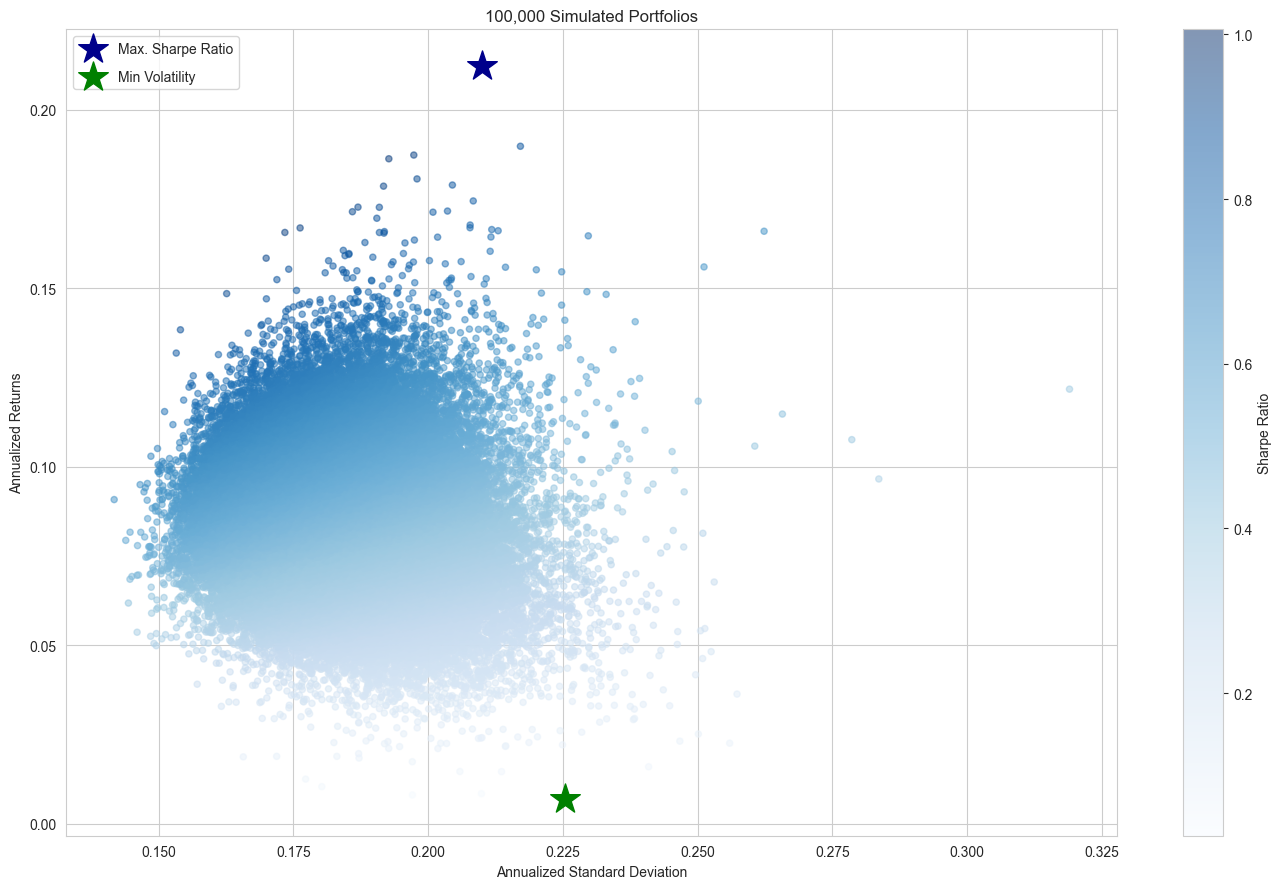

In [111]:
import warnings
warnings.filterwarnings('ignore')
ax = simul_perf.plot.scatter(x=0, y=1, c=2, cmap='Blues',
                             alpha=0.5, figsize=(14, 9), colorbar=True,
                             title=f'{NUM_PF:,d} Simulated Portfolios')

#max_sharpe_idx = simul_perf.iloc[:, 2].idxmax()
max_sharpe_idx = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].max())[0][0]
sd, r = simul_perf.iloc[max_sharpe_idx, :2].values
print(f'Max Sharpe: {sd:.2%}, {r:.2%}')
ax.scatter(sd, r, marker='*', color='darkblue', s=500, label='Max. Sharpe Ratio')

#min_vol_idx = simul_perf.iloc[:, 0].idxmin()
min_vol_idx = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].min())[0][0]
sd, r = simul_perf.iloc[min_vol_idx, :2].values
ax.scatter(sd, r, marker='*', color='green', s=500, label='Min Volatility')
plt.legend(labelspacing=1, loc='upper left')
plt.tight_layout()

# Compute Annualize PF Performance
Now we'll set up the quadratic optimization problem to solve for the minimum standard deviation for a given return or the maximum SR.

To this end, define the functions that measure the key metrics:


In [163]:
def portfolio_std(wt, rt=None, cov=None):
    """Annualized PF standard deviation"""
    return np.sqrt(wt @ cov @ wt * periods_per_year)

In [164]:
def portfolio_returns(wt, rt=None, cov=None):
    """Annualized PF returns"""
    return (wt @ rt + 1) ** periods_per_year - 1

In [165]:
def portfolio_performance(wt, rt, cov):
    """Annualized PF returns & standard deviation"""
    r = portfolio_returns(wt, rt=rt)
    sd = portfolio_std(wt, cov=cov)
    return r, sd

# Max Sharpe PF
Define a target function that represents the negative SR for scipy's minimize function to optimize, given the constraints that the weights are bounded by [-1, 1], if short trading is permitted, and [0, 1] otherwise, and sum to one in absolute terms.

In [115]:
def neg_sharpe_ratio(weights, mean_ret, cov):
    r, sd = portfolio_performance(weights, mean_ret, cov)
    return -(r - rf_rate) / sd

In [116]:
weight_constraint = {'type': 'eq', 
                     'fun': lambda x: np.sum(np.abs(x))-1}

In [117]:
def max_sharpe_ratio(mean_ret, cov, short=False):
    return minimize(fun=neg_sharpe_ratio,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=((-1 if short else 0, 1),) * n_assets,
                    constraints=weight_constraint,
                    options={'tol':1e-10, 'maxiter':1e4})

# Compute Efficient Frontier
The solution requires iterating over ranges of acceptable values to identify optimal risk-return combinations

In [166]:
def min_vol_target(mean_ret, cov, target, short=False):

    def ret_(wt):
        return portfolio_returns(wt, mean_ret)

    constraints = [{'type': 'eq',
                    'fun': lambda x: ret_(x) - target},
                   weight_constraint]

    bounds = ((-1 if short else 0, 1),) * n_assets
    return minimize(portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=constraints,
                    options={'tol': 1e-10, 'maxiter': 1e4})

# Min Volatility Portfolio

In [167]:
def min_vol(mean_ret, cov, short=False):
    bounds = ((-1 if short else 0, 1),) * n_assets

    return minimize(fun=portfolio_std,
                    x0=x0,
                    args=(mean_ret, cov),
                    method='SLSQP',
                    bounds=bounds,
                    constraints=weight_constraint,
                    options={'tol': 1e-10, 'maxiter': 1e4})

In [168]:
def efficient_frontier(mean_ret, cov, ret_range, short=False):
    return [min_vol_target(mean_ret, cov, ret) for ret in ret_range]


An error occurred while requesting URL('https://api.refinitiv.com/auth/oauth2/v1/token'). with : [Errno 8] nodename nor servname provided, or not known
An error occurred while requesting URL('https://api.refinitiv.com/auth/oauth2/v1/token'). with : [Errno 8] nodename nor servname provided, or not known
An error occurred while requesting URL('https://api.refinitiv.com/auth/oauth2/v1/token'). with : [Errno 8] nodename nor servname provided, or not known
An error occurred while requesting URL('https://api.refinitiv.com/auth/oauth2/v1/token'). with : [Errno 8] nodename nor servname provided, or not known
An error occurred while requesting URL('https://api.refinitiv.com/auth/oauth2/v1/token'). with : [Errno 8] nodename nor servname provided, or not known
An error occurred while requesting URL('https://api.refinitiv.com/auth/oauth2/v1/token'). with : [Errno 8] nodename nor servname provided, or not known
An error occurred while requesting URL('https://api.refinitiv.com/auth/oauth2/v1/token')

# Run Calculation
## Get random PF

In [121]:
simul_perf, simul_wt = simulate_portfolios(mean_returns, cov_matrix, short=False)

In [122]:
print(simul_perf.describe())

       Annualized Standard Deviation  Annualized Returns   Sharpe Ratio
count                  100000.000000       100000.000000  100000.000000
mean                        0.183223            0.085320       0.463775
std                         0.012061            0.016761       0.098001
min                         0.143412           -0.003270      -0.019027
25%                         0.174931            0.074372       0.399330
50%                         0.182326            0.085081       0.464121
75%                         0.190570            0.096027       0.528838
max                         0.299532            0.221033       1.136253


In [123]:
simul_max_sharpe = np.where(simul_perf.iloc[:, 2] == simul_perf.iloc[:, 2].max())[0][0]
simul_perf.iloc[simul_max_sharpe]

Annualized Standard Deviation    0.193811
Annualized Returns               0.221033
Sharpe Ratio                     1.136253
Name: 10755, dtype: float64

In [124]:
# Get Max Sharpe PF

In [125]:
max_sharpe_pf = max_sharpe_ratio(mean_returns, cov_matrix, short=False)
max_sharpe_perf = portfolio_performance(max_sharpe_pf.x, mean_returns, cov_matrix)

In [126]:
r, sd = max_sharpe_perf
pd.Series({'ret': r, 'sd': sd, 'sr': (r-rf_rate)/sd})

ret    0.334173
sd     0.188279
sr     1.770557
dtype: float64

# Get Min Vol PF

In [127]:
min_vol_pf = min_vol(mean_returns, cov_matrix, short=False)
min_vol_perf = portfolio_performance(min_vol_pf.x, mean_returns, cov_matrix)

In [128]:
ret_range = np.linspace(simul_perf.iloc[:, 1].min(), simul_perf.iloc[:, 1].max(), 50)
eff_pf = efficient_frontier(mean_returns, cov_matrix, ret_range, short=True)
eff_pf = pd.Series(dict(zip([p['fun'] for p in eff_pf], ret_range)))

# Plot Result

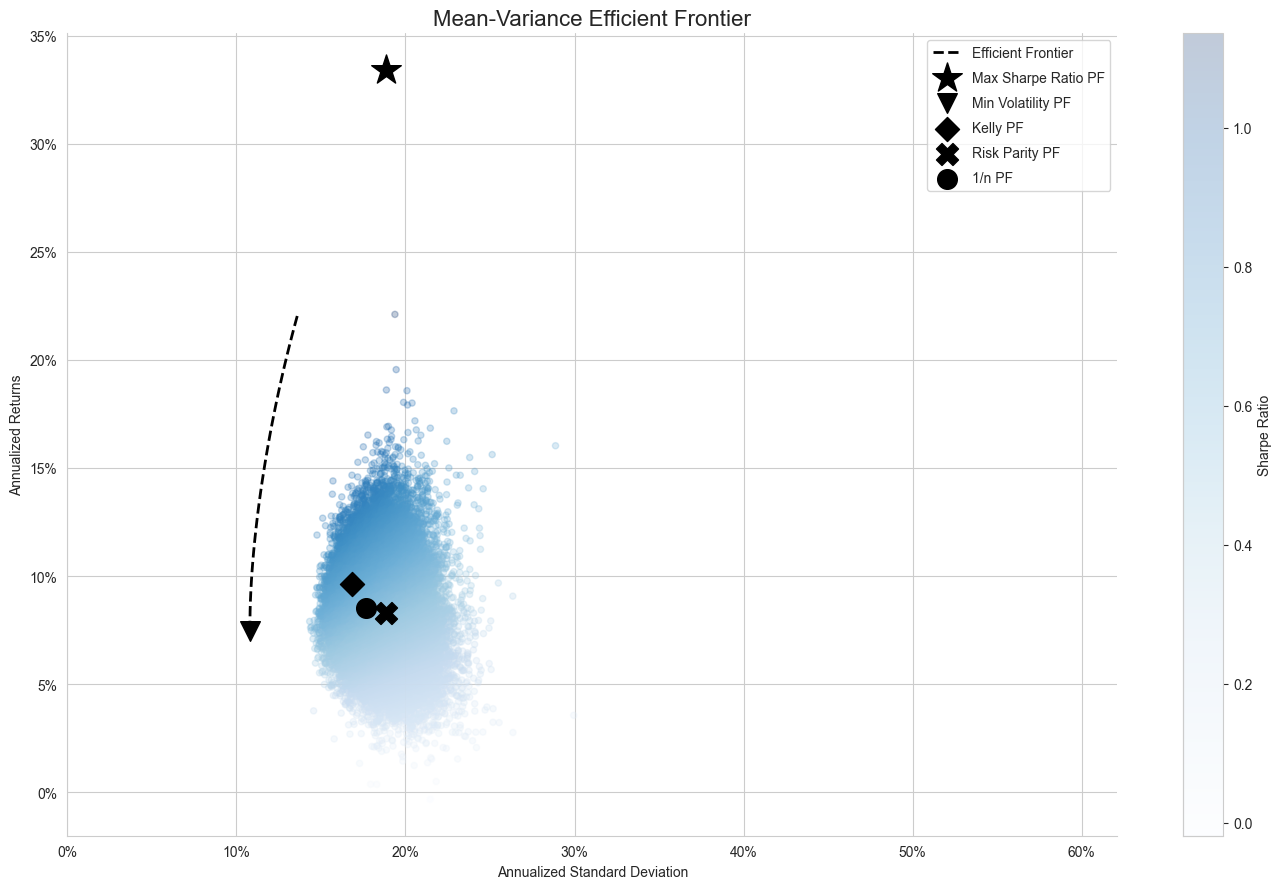

In [129]:
fig, ax = plt.subplots()
simul_perf.plot.scatter(x=0, y=1, c=2, ax=ax, cmap='Blues',alpha=0.25, 
                        figsize=(14, 9), colorbar=True)

eff_pf[eff_pf.index.min():].plot(linestyle='--', lw=2, ax=ax, c='k',
                                 label='Efficient Frontier')

r, sd = max_sharpe_perf
ax.scatter(sd, r, marker='*', color='k', s=500, label='Max Sharpe Ratio PF')

r, sd = min_vol_perf
ax.scatter(sd, r, marker='v', color='k', s=200, label='Min Volatility PF')

kelly_wt = precision_matrix.dot(mean_returns).clip(lower=0).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='D', color='k', s=150, label='Kelly PF')

std = weekly_returns.std()
std /= std.sum()
r, sd = portfolio_performance(std, mean_returns, cov_matrix)
ax.scatter(sd, r, marker='X', color='k', s=250, label='Risk Parity PF')

r, sd = portfolio_performance(np.full(n_assets, 1/n_assets), mean_returns, cov_matrix)
ax.scatter(sd, r, marker='o', color='k', s=200, label='1/n PF')


ax.legend(labelspacing=0.8)
ax.set_xlim(0, eff_pf.max()+.4)
ax.set_title('Mean-Variance Efficient Frontier', fontsize=16)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
ax.xaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
sns.despine()
fig.tight_layout();

In [130]:
kelly_wt = precision_matrix.dot(mean_returns).clip(lower=0).values
kelly_wt /= np.sum(np.abs(kelly_wt))
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)

In [131]:
kelly_wt

array([0.00000000e+00, 0.00000000e+00, 2.46202335e-03, 0.00000000e+00,
       0.00000000e+00, 7.33438924e-03, 7.03309802e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.06209658e-02, 2.93768859e-03,
       3.79354335e-03, 0.00000000e+00, 0.00000000e+00, 3.47787466e-03,
       6.84921247e-03, 0.00000000e+00, 5.62141121e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.41290181e-03, 3.89960220e-03, 1.42106890e-03, 4.81171087e-03,
       1.03997078e-03, 0.00000000e+00, 1.43295622e-04, 0.00000000e+00,
       2.88163644e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.28633593e-03, 0.00000000e+00, 2.14347608e-03, 2.03020307e-03,
       1.28250009e-02, 5.36170674e-03, 5.32937307e-03, 6.65857435e-03,
       0.00000000e+00, 0.00000000e+00, 7.58856614e-03, 1.25541338e-03,
       1.63935363e-03, 1.47118680e-03, 0.00000000e+00, 4.64715554e-03,
       1.60945286e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [132]:
r, sd = portfolio_performance(kelly_wt, mean_returns, cov_matrix)


In [133]:
print(r, sd)

0.0964246462686309 0.16850952590207072


In [134]:
max_sharpe_pf['x']

array([0.00000000e+00, 0.00000000e+00, 3.45467249e-14, 0.00000000e+00,
       9.74136988e-15, 0.00000000e+00, 2.08667247e-15, 1.01239912e-15,
       5.12801871e-15, 4.90892499e-14, 0.00000000e+00, 0.00000000e+00,
       4.55799915e-14, 2.07302368e-16, 1.90777335e-14, 0.00000000e+00,
       0.00000000e+00, 6.27080174e-14, 4.31903877e-15, 2.79923144e-14,
       0.00000000e+00, 1.18281200e-15, 0.00000000e+00, 0.00000000e+00,
       9.74610409e-15, 3.52021389e-15, 1.58447861e-14, 4.25901904e-14,
       5.49077787e-14, 7.19856310e-15, 0.00000000e+00, 2.51979643e-16,
       2.80233806e-17, 0.00000000e+00, 0.00000000e+00, 3.54319909e-14,
       2.39867203e-01, 4.06115642e-15, 2.43480873e-14, 5.08823897e-15,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.58141572e-14, 1.08508990e-14, 0.00000000e+00, 3.48544053e-14,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.08946678e-14, 0.00000000e+00, 5.86412735e-03, 1.52030045e-14,
      

In [135]:
max_sharpe_pf

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.7705569551112308
       x: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
     nit: 12
     jac: [ 2.221e-01  6.215e-01 ...  4.028e-01 -2.500e-01]
    nfev: 5612
    njev: 12